In [1]:
import os

def list_directory_tree(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}{f}")

# Example usage
list_directory_tree('.')

./
    LICENSE
    dev.duckdb
    dbt_project.yml
    profiles.yml
    .pre-commit-config.yaml
    README.md
    .user.yml
    .envrc
    .sqlfluffignore
    .gitignore
    .sqlfluff
    analyse.ipynb
    requirements.txt
    scripts/
        build_more_formats.sql
        build_dev_data.sql
        export_prod_data_source.sql
    .venv/
        pyvenv.cfg
        bin/
            pytest
            sqlfluff
            jupyter-troubleshoot
            tqdm
            jupyter-run
            python3.12
            pre-commit
            pip3
            pip
            python
            python3
            nodeenv
            Activate.ps1
            identify-cli
            activate.fish
            sqlformat
            py.test
            pybabel
            diff-quality
            deep
            normalizer
            ipython3
            activate.csh
            jsonschema
            pygmentize
            pip3.12
            chardetect
            jupyter-kernel
           

Loading matches data...
Loading match players data...

Matches dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   match_id       10 non-null     int64         
 1   start_time     10 non-null     datetime64[us]
 2   map            10 non-null     object        
 3   team_count     10 non-null     int32         
 4   game_type      10 non-null     object        
 5   winning_team   10 non-null     int64         
 6   game_duration  9 non-null      float64       
 7   is_ranked      10 non-null     bool          
 8   replay_id      8 non-null      object        
 9   engine         8 non-null      object        
 10  game_version   8 non-null      object        
 11  is_public      10 non-null     bool          
dtypes: bool(2), datetime64[us](1), float64(1), int32(1), int64(2), object(5)
memory usage: 912.0+ bytes
No

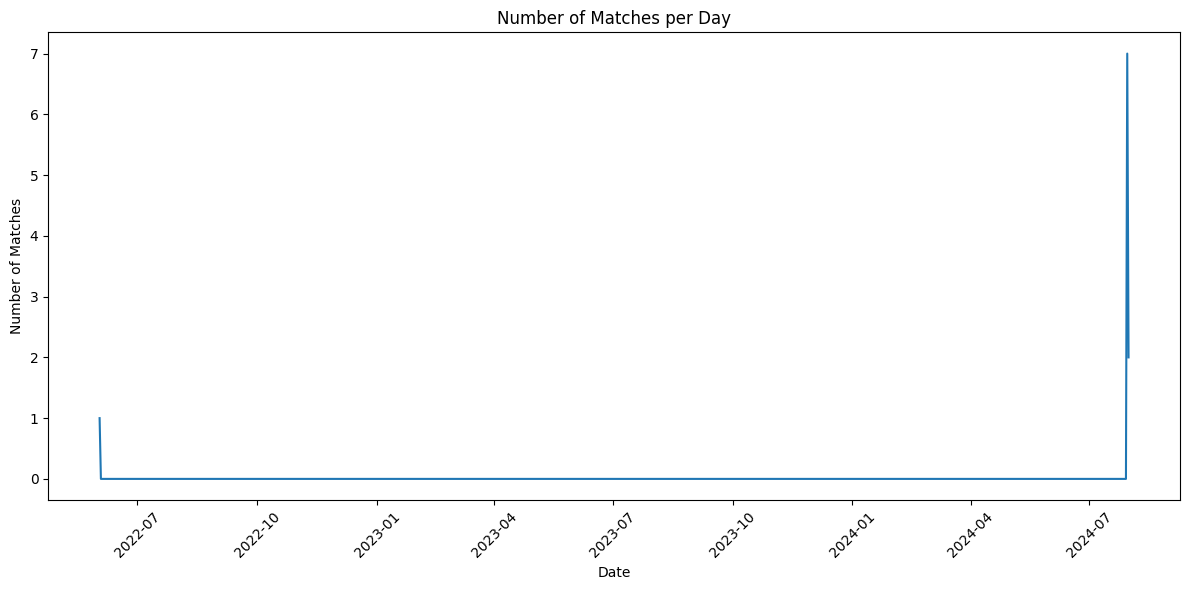

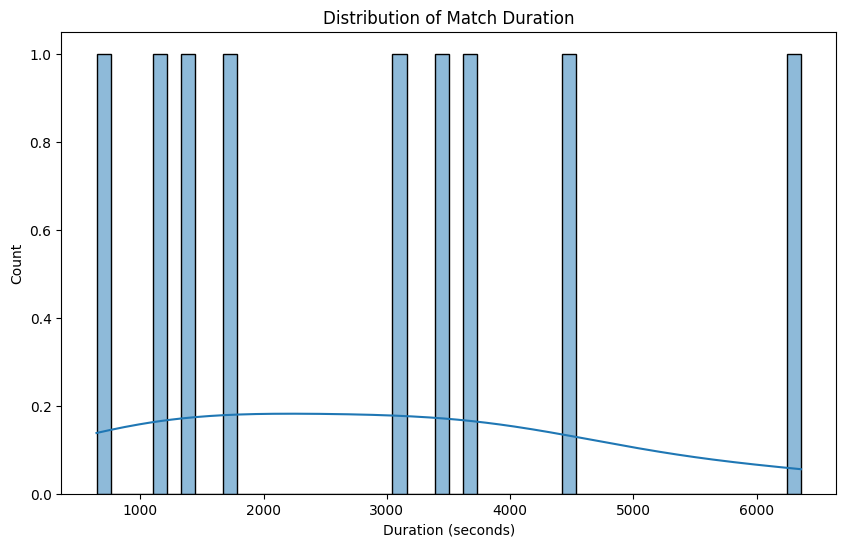

'player_name' column not found in match players data

Most Popular Game Types:
game_type
Small Team    2
Team          1
Large Team    1
Duel          1
Bots          1
Name: count, dtype: int64

Average number of teams per match: 2.10

Faction Distribution:
faction
Armada     33
Cortex     23
Unknown     6
Name: count, dtype: int64
'is_winner' column not found in match players data

Top 10 Most Popular Maps:
map
Full Metal Plate 1.7      3
Sunderance V1.2           1
All That Glitters v2.2    1
World In Flames v1.8      1
Altair_Crossing_V4.1      1
Pinewood_Derby_V1         1
Oort_Cloud_V2             1
Mediterraneum_V1          1
Name: count, dtype: int64


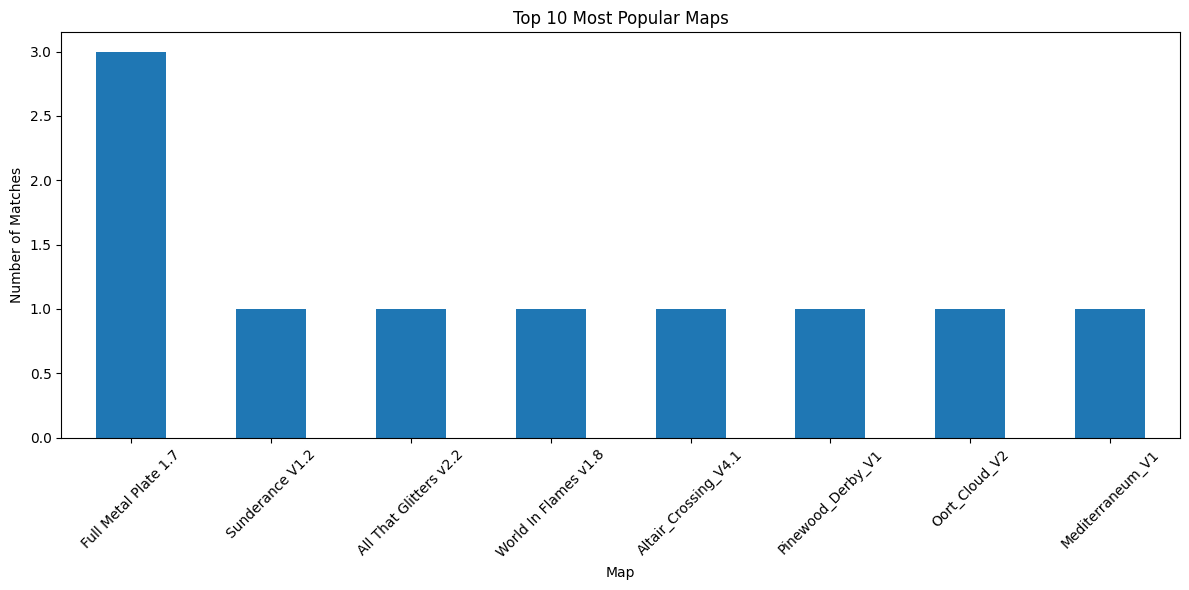


Ranked vs Unranked Matches:
is_ranked
True     5
False    5
Name: count, dtype: int64


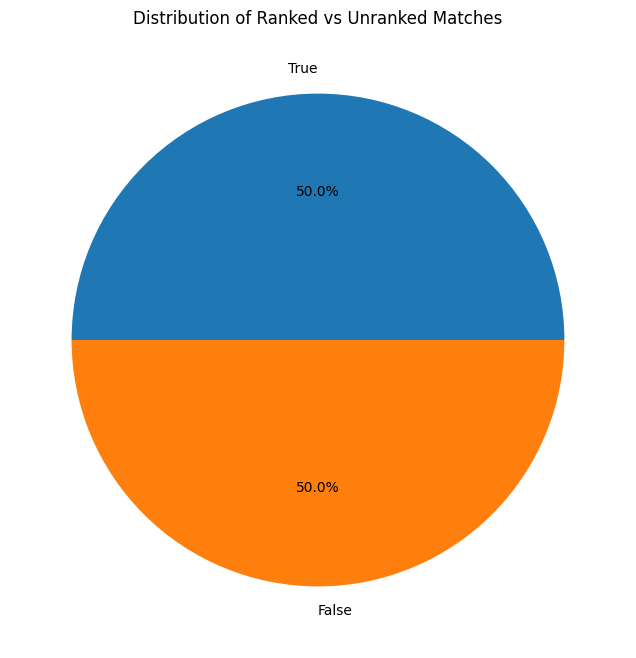

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_data(parquet_path, csv_path):
    try:
        return pd.read_parquet(parquet_path)
    except ImportError:
        print(f"Failed to read Parquet file. Attempting to read CSV file.")
        if os.path.exists(csv_path):
            return pd.read_csv(csv_path)
        else:
            raise FileNotFoundError(f"Neither Parquet nor CSV file found at {parquet_path} or {csv_path}")

# File paths
matches_parquet = 'data_export/matches.parquet'
matches_csv = 'data_export/matches.csv'
match_players_parquet = 'data_export/match_players.parquet'
match_players_csv = 'data_export/match_players.csv'

# Load the data
print("Loading matches data...")
matches_df = load_data(matches_parquet, matches_csv)
print("Loading match players data...")
match_players_df = load_data(match_players_parquet, match_players_csv)

# Display basic information about the dataframes
print("\nMatches dataset info:")
print(matches_df.info())
print("\nMatch players dataset info:")
print(match_players_df.info())

# Basic analysis: Number of matches over time
matches_df['start_time'] = pd.to_datetime(matches_df['start_time'])
matches_per_day = matches_df.resample('D', on='start_time').size()

plt.figure(figsize=(12, 6))
plt.plot(matches_per_day.index, matches_per_day.values)
plt.title('Number of Matches per Day')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze match duration
if 'game_duration' in matches_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(matches_df['game_duration'], bins=50, kde=True)
    plt.title('Distribution of Match Duration')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.show()
else:
    print("'game_duration' column not found in matches data")

# Top 10 players by number of matches
if 'player_name' in match_players_df.columns:
    top_players = match_players_df['player_name'].value_counts().head(10)
    print("\nTop 10 Players by Number of Matches:")
    print(top_players)
else:
    print("'player_name' column not found in match players data")

# Most popular game types
if 'game_type' in matches_df.columns:
    game_types = matches_df['game_type'].value_counts()
    print("\nMost Popular Game Types:")
    print(game_types.head())
else:
    print("'game_type' column not found in matches data")

# Average players per match
if 'team_count' in matches_df.columns:
    avg_players = matches_df['team_count'].mean()
    print(f"\nAverage number of teams per match: {avg_players:.2f}")
else:
    print("'team_count' column not found in matches data")

# Faction analysis
if 'faction' in match_players_df.columns:
    faction_counts = match_players_df['faction'].value_counts()
    print("\nFaction Distribution:")
    print(faction_counts)

    # Win rate by faction
    if 'is_winner' in match_players_df.columns:
        faction_wins = match_players_df[match_players_df['is_winner'] == 1]['faction'].value_counts()
        faction_win_rates = (faction_wins / faction_counts * 100).sort_values(ascending=False)
        print("\nWin Rates by Faction:")
        print(faction_win_rates)

        # Visualize win rates
        plt.figure(figsize=(10, 6))
        faction_win_rates.plot(kind='bar')
        plt.title('Win Rates by Faction')
        plt.xlabel('Faction')
        plt.ylabel('Win Rate (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("'is_winner' column not found in match players data")
else:
    print("'faction' column not found in match players data")

# Additional analysis: Map popularity
if 'map' in matches_df.columns:
    map_popularity = matches_df['map'].value_counts().head(10)
    print("\nTop 10 Most Popular Maps:")
    print(map_popularity)

    plt.figure(figsize=(12, 6))
    map_popularity.plot(kind='bar')
    plt.title('Top 10 Most Popular Maps')
    plt.xlabel('Map')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'map' column not found in matches data")

# Ranked vs Unranked matches
if 'is_ranked' in matches_df.columns:
    ranked_counts = matches_df['is_ranked'].value_counts()
    print("\nRanked vs Unranked Matches:")
    print(ranked_counts)

    plt.figure(figsize=(8, 8))
    plt.pie(ranked_counts.values, labels=ranked_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Ranked vs Unranked Matches')
    plt.show()
else:
    print("'is_ranked' column not found in matches data")

In [9]:
ls data_source/dev

replay_ally_teams.parquet  teiserver_battle_match_memberships.parquet
replay_demos.parquet       teiserver_battle_matches.parquet
replay_maps.parquet        teiserver_game_rating_logs.parquet
replay_players.parquet


Game Type Distribution:
game_type
Small Team    2
Team          1
Large Team    1
Duel          1
Bots          1
FFA           1
Raptors       1
Scavengers    1
Team FFA      1
Name: count, dtype: int64


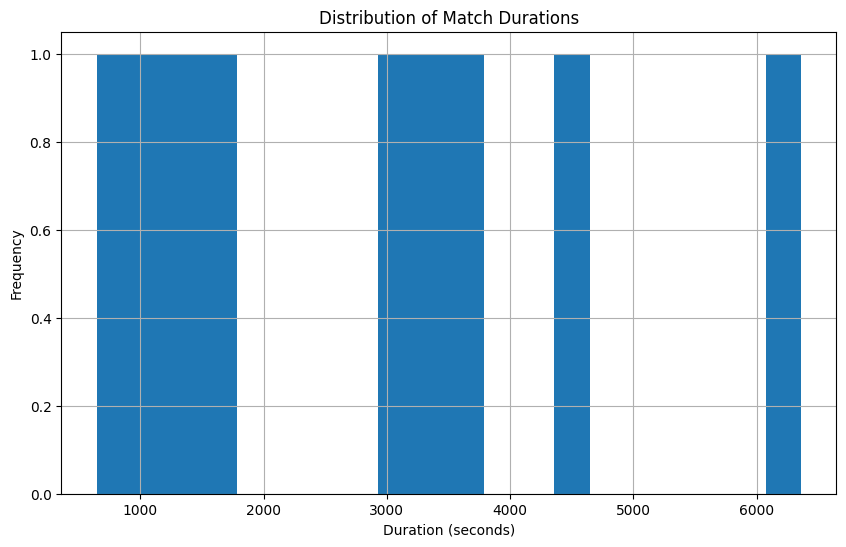


Match Duration Statistics:
count       9.000000
mean     2897.000000
std      1847.924985
min       644.000000
25%      1412.000000
50%      3124.000000
75%      3720.000000
max      6361.000000
Name: game_duration, dtype: float64

Ranked vs Unranked Matches:
is_ranked
True     5
False    5
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_parquet('data_export/matches.parquet')

# Game Type Analysis
game_type_counts = df['game_type'].value_counts()
print("Game Type Distribution:")
print(game_type_counts)

# Match Duration Analysis
plt.figure(figsize=(10, 6))
df['game_duration'].hist(bins=20)
plt.title('Distribution of Match Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

print("\nMatch Duration Statistics:")
print(df['game_duration'].describe())

# Ranked vs Unranked Analysis
ranked_counts = df['is_ranked'].value_counts()
print("\nRanked vs Unranked Matches:")
print(ranked_counts)

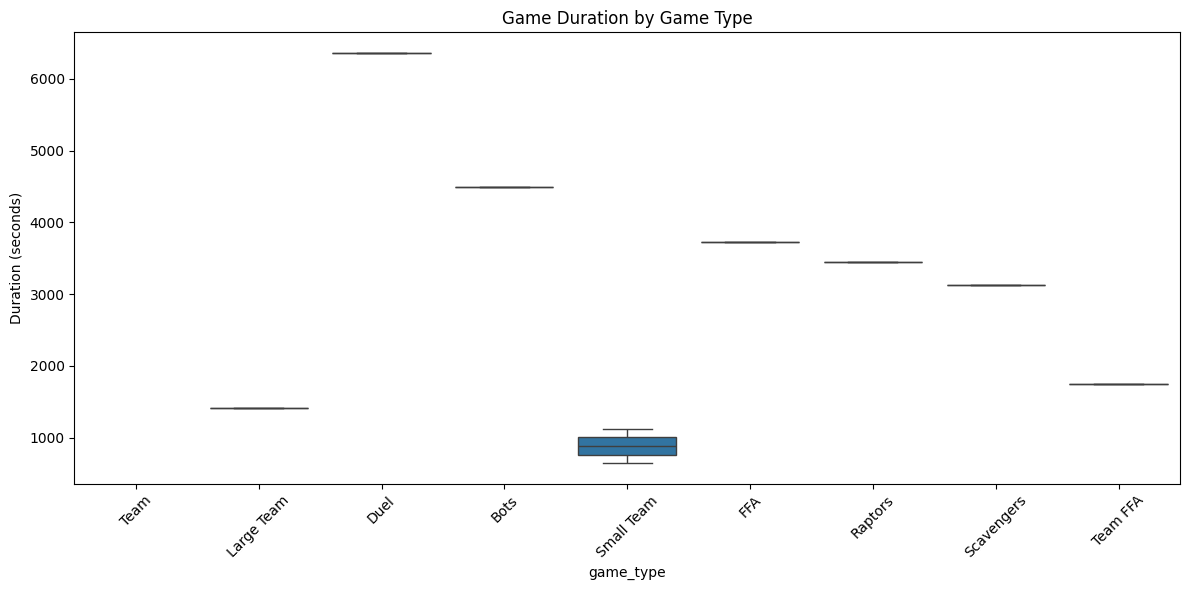

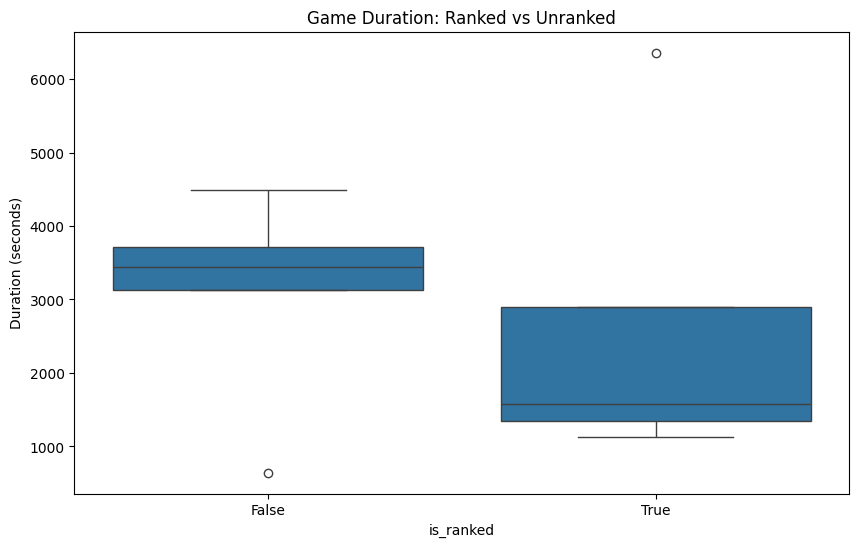


Average Duration for Ranked vs Unranked:
is_ranked
False    3085.20
True     2661.75
Name: game_duration, dtype: float64


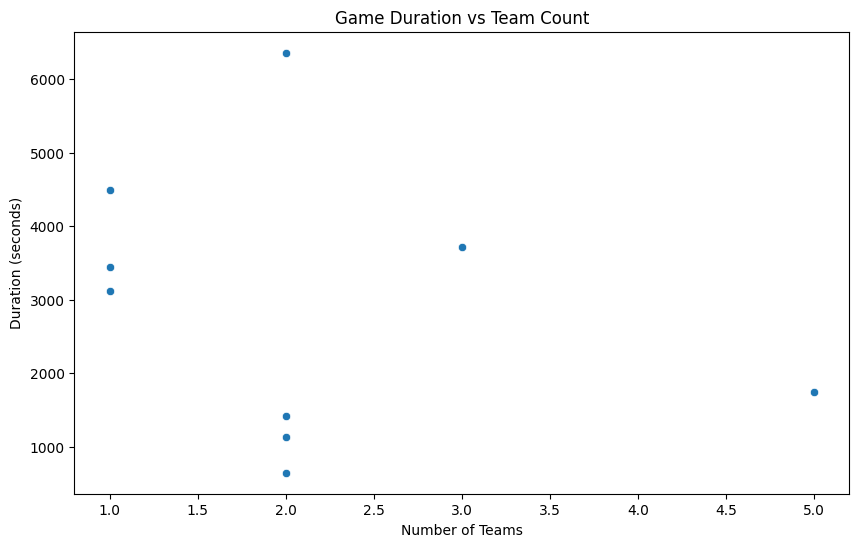


Most Common Maps:
map
Full Metal Plate 1.7      3
Sunderance V1.2           1
All That Glitters v2.2    1
World In Flames v1.8      1
Altair_Crossing_V4.1      1
Pinewood_Derby_V1         1
Oort_Cloud_V2             1
Mediterraneum_V1          1
Name: count, dtype: int64


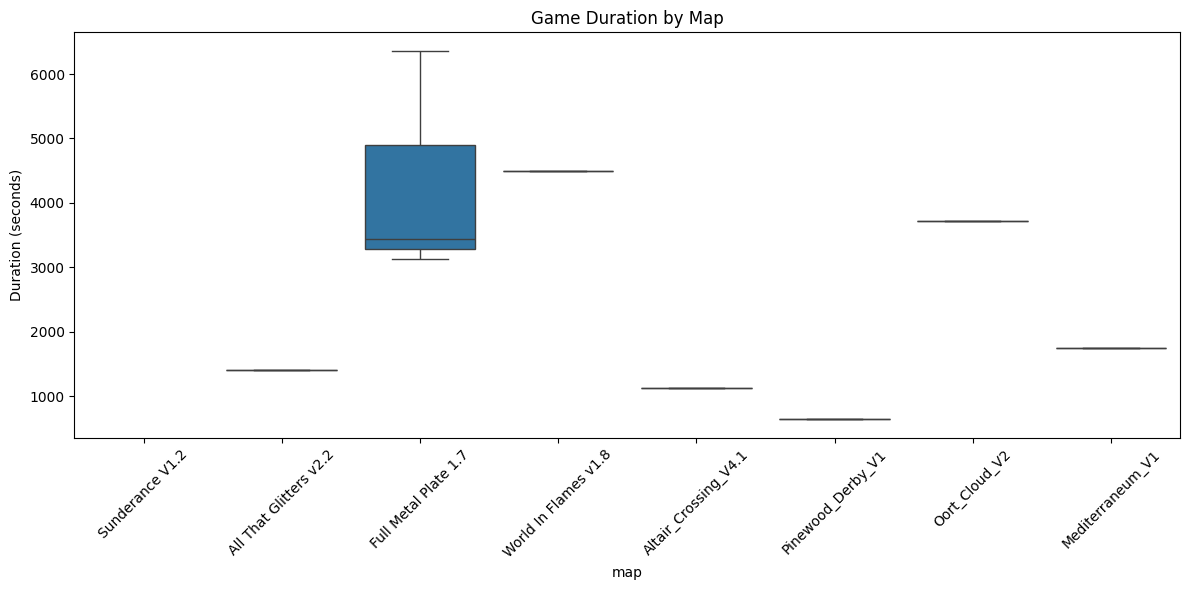


Correlation between team_count and game_duration:
-0.26635397409714917

Average team count for each game type:
game_type
Team FFA      5.0
FFA           3.0
Team          2.0
Large Team    2.0
Duel          2.0
Small Team    2.0
Bots          1.0
Raptors       1.0
Scavengers    1.0
Name: team_count, dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_parquet('data_export/matches.parquet')

# 1. Game Type vs Duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='game_type', y='game_duration', data=df)
plt.title('Game Duration by Game Type')
plt.xticks(rotation=45)
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()

# 2. Ranked vs Unranked Duration Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_ranked', y='game_duration', data=df)
plt.title('Game Duration: Ranked vs Unranked')
plt.ylabel('Duration (seconds)')
plt.show()

print("\nAverage Duration for Ranked vs Unranked:")
print(df.groupby('is_ranked')['game_duration'].mean())

# 3. Team Count vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='team_count', y='game_duration', data=df)
plt.title('Game Duration vs Team Count')
plt.xlabel('Number of Teams')
plt.ylabel('Duration (seconds)')
plt.show()

# 4. Map Analysis
map_counts = df['map'].value_counts()
print("\nMost Common Maps:")
print(map_counts)

plt.figure(figsize=(12, 6))
sns.boxplot(x='map', y='game_duration', data=df)
plt.title('Game Duration by Map')
plt.xticks(rotation=45)
plt.ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()

# 5. Additional Insights
print("\nCorrelation between team_count and game_duration:")
print(df['team_count'].corr(df['game_duration']))

print("\nAverage team count for each game type:")
print(df.groupby('game_type')['team_count'].mean().sort_values(ascending=False))

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
matches_df = pd.read_parquet('data_source/prod/matches.parquet')
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Basic info
print("Matches dataset info:")
print(matches_df.info())
print("\nMatch players dataset info:")
print(players_df.info())

# Analyze matches over time
matches_df['start_time'] = pd.to_datetime(matches_df['start_time'])
matches_per_day = matches_df.resample('D', on='start_time').size()

plt.figure(figsize=(15, 7))
plt.plot(matches_per_day.index, matches_per_day.values)
plt.title('Number of Matches per Day')
plt.xlabel('Date')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('matches_per_day.png')
plt.close()

# Analyze game types
game_type_counts = matches_df['game_type'].value_counts()
print("\nGame Type Distribution:")
print(game_type_counts)

plt.figure(figsize=(12, 6))
game_type_counts.plot(kind='bar')
plt.title('Game Type Distribution')
plt.xlabel('Game Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('game_type_distribution.png')
plt.close()

# Analyze player skills
plt.figure(figsize=(12, 6))
sns.histplot(players_df['new_skill'], kde=True)
plt.title('Distribution of Player Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.savefig('player_skill_distribution.png')
plt.close()

# Analyze match duration
plt.figure(figsize=(12, 6))
sns.histplot(matches_df['game_duration'] / 60, kde=True)  # Convert to minutes
plt.title('Distribution of Match Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.savefig('match_duration_distribution.png')
plt.close()

# Analyze team sizes
team_sizes = matches_df['team_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
team_sizes.plot(kind='bar')
plt.title('Distribution of Team Sizes')
plt.xlabel('Number of Teams')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('team_size_distribution.png')
plt.close()

# Analyze faction preference
faction_counts = players_df['faction'].value_counts()
plt.figure(figsize=(10, 6))
faction_counts.plot(kind='bar')
plt.title('Faction Preference')
plt.xlabel('Faction')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('faction_preference.png')
plt.close()

# Analyze skill improvement
skill_improvement = players_df['new_skill'] - players_df['old_skill']
plt.figure(figsize=(12, 6))
sns.histplot(skill_improvement, kde=True)
plt.title('Distribution of Skill Improvement per Match')
plt.xlabel('Skill Improvement')
plt.ylabel('Count')
plt.savefig('skill_improvement_distribution.png')
plt.close()

# Analyze ranked vs unranked matches
ranked_counts = matches_df['is_ranked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ranked_counts, labels=['Unranked', 'Ranked'], autopct='%1.1f%%')
plt.title('Ranked vs Unranked Matches')
plt.savefig('ranked_vs_unranked.png')
plt.close()

print("\nAnalysis complete. Check the generated PNG files for visualizations.")

# Additional statistics
print("\nAdditional Statistics:")
print(f"Total number of matches: {len(matches_df)}")
print(f"Total number of player records: {len(players_df)}")
print(f"Average match duration: {matches_df['game_duration'].mean() / 60:.2f} minutes")
print(f"Average team count: {matches_df['team_count'].mean():.2f}")
print(f"Percentage of ranked matches: {(matches_df['is_ranked'].sum() / len(matches_df)) * 100:.2f}%")
print(f"Average initial skill: {players_df['old_skill'].mean():.2f}")
print(f"Average final skill: {players_df['new_skill'].mean():.2f}")

Matches dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534380 entries, 0 to 534379
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   match_id       534380 non-null  int64         
 1   start_time     534380 non-null  datetime64[us]
 2   map            534380 non-null  object        
 3   team_count     534380 non-null  int32         
 4   game_type      534380 non-null  object        
 5   winning_team   534380 non-null  int64         
 6   game_duration  531471 non-null  float64       
 7   is_ranked      534380 non-null  bool          
 8   replay_id      519729 non-null  object        
 9   engine         519729 non-null  object        
 10  game_version   519729 non-null  object        
 11  is_public      534380 non-null  bool          
dtypes: bool(2), datetime64[us](1), float64(1), int32(1), int64(2), object(5)
memory usage: 39.8+ MB
None

Match players dataset info:
<cla

In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the data
matches_df = pd.read_parquet('data_source/prod/matches.parquet')
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Filter for player 134300
player_matches = players_df[players_df['user_id'] == 134300]

print(f"Total matches for player 134300: {len(player_matches)}")

if len(player_matches) == 0:
    print("No data found for player 134300.")
else:
    # Merge with match data
    player_matches = player_matches.merge(matches_df, on='match_id')
    
    print("\nGame type distribution:")
    print(player_matches['game_type'].value_counts())
    
    print("\nRanked vs Unranked:")
    print(player_matches['is_ranked'].value_counts())
    
    # Filter for ranked team games
    ranked_team_matches = player_matches[(player_matches['is_ranked'] == True) & (player_matches['game_type'].str.contains('Team'))]
    
    print(f"\nRanked team games played: {len(ranked_team_matches)}")
    
    if len(ranked_team_matches) > 0:
        # Sort by start time
        ranked_team_matches = ranked_team_matches.sort_values('start_time')
        
        # Calculate daily stats
        daily_stats = ranked_team_matches.groupby(ranked_team_matches['start_time'].dt.date).agg({
            'match_id': 'count',
            'new_skill': 'last',
            'old_skill': 'first'
        }).reset_index()
        
        daily_stats['skill_change'] = daily_stats['new_skill'] - daily_stats['old_skill']
        daily_stats['cumulative_matches'] = daily_stats['match_id'].cumsum()
        
        # Create subplots
        fig = make_subplots(rows=4, cols=1, 
                            shared_xaxes=True, 
                            vertical_spacing=0.1,
                            subplot_titles=('Daily Matches Played', 'Skill Level', 'Daily Skill Change', 'Overall Statistics'))
        
        # Daily Matches Played
        fig.add_trace(go.Bar(x=daily_stats['start_time'], y=daily_stats['match_id'], name='Matches Played'),
                      row=1, col=1)
        
        # Skill Level
        fig.add_trace(go.Scatter(x=daily_stats['start_time'], y=daily_stats['new_skill'], mode='lines+markers', name='Skill Level'),
                      row=2, col=1)
        
        # Daily Skill Change
        fig.add_trace(go.Bar(x=daily_stats['start_time'], y=daily_stats['skill_change'], name='Skill Change'),
                      row=3, col=1)
        
        # Overall Statistics as text
        overall_stats = [
            f"Total matches: {len(player_matches)}",
            f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}",
            f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}",
            f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}",
            f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}",
            f"Overall win rate: {(player_matches['winning_team'] == player_matches['team_id']).mean():.2%}"
        ]
        
        # Add overall stats as annotations
        for i, stat in enumerate(overall_stats):
            fig.add_annotation(
                x=0.5, y=1 - (i + 1) * 0.15,
                xref="paper", yref="paper",
                text=stat,
                showarrow=False,
                font=dict(size=12),
                align="left",
                row=4, col=1
            )
        
        # Update layout
        fig.update_layout(height=1200, width=1200, title_text="Player 134300 - Comprehensive Analysis")
        fig.update_xaxes(title_text="Date", row=3, col=1)
        fig.update_yaxes(title_text="Matches", row=1, col=1)
        fig.update_yaxes(title_text="Skill", row=2, col=1)
        fig.update_yaxes(title_text="Skill Change", row=3, col=1)
        
        # Save the plot as an interactive HTML file
        fig.write_html("player_134300_analysis.html")
        
        # Print statistics
        print(f"Date range: {ranked_team_matches['start_time'].min().date()} to {ranked_team_matches['start_time'].max().date()}")
        print(f"Initial skill: {ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Final skill: {ranked_team_matches['new_skill'].iloc[-1]:.2f}")
        print(f"Overall skill change: {ranked_team_matches['new_skill'].iloc[-1] - ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Average daily matches: {daily_stats['match_id'].mean():.2f}")
        print(f"Max daily matches: {daily_stats['match_id'].max()}")
        print(f"Days played: {len(daily_stats)}")
        
        # Calculate and print win rate
        ranked_team_matches['is_winner'] = ranked_team_matches['winning_team'] == ranked_team_matches['team_id']
        win_rate = ranked_team_matches['is_winner'].mean()
        print(f"Win rate: {win_rate:.2%}")
        
        # Export daily stats to CSV for further analysis if needed
        daily_stats.to_csv("player_134300_daily_stats.csv", index=False)
        
        print("\nAnalysis complete. Check player_134300_analysis.html for interactive visualizations.")
    else:
        print("No ranked team games found for player 134300.")
    
    # Print overall stats regardless of game type
    print("\nOverall stats (all game types):")
    print(f"Total matches: {len(player_matches)}")
    print(f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}")
    print(f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}")
    print(f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}")
    print(f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}")
    
    player_matches['is_winner'] = player_matches['winning_team'] == player_matches['team_id']
    overall_win_rate = player_matches['is_winner'].mean()
    print(f"Overall win rate: {overall_win_rate:.2%}")

Total matches for player 134300: 1148

Game type distribution:
game_type
Team          792
Bots          136
Large Team    104
Small Team     36
Duel           30
FFA            29
Team FFA        9
Raptors         7
Scavengers      5
Name: count, dtype: int64

Ranked vs Unranked:
is_ranked
True     940
False    208
Name: count, dtype: int64

Ranked team games played: 884
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: 35.00
Overall skill change: 10.00
Average daily matches: 3.59
Max daily matches: 16
Days played: 246
Win rate: 53.96%

Analysis complete. Check player_134300_analysis.html for interactive visualizations.

Overall stats (all game types):
Total matches: 1148
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: nan
Overall skill change: nan
Overall win rate: 58.28%


In [11]:
import pandas as pd

# Load the player data
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Print the column names
print("Columns in the players dataframe:")
print(players_df.columns)

# Print info about the dataframe
print("\nDataframe info:")
print(players_df.info())

# If 'old_skill' and 'new_skill' exist, show some basic stats
if 'old_skill' in players_df.columns and 'new_skill' in players_df.columns:
    print("\nBasic statistics for skill columns:")
    print(players_df[['old_skill', 'new_skill']].describe())
else:
    print("\n'old_skill' and 'new_skill' are not direct columns in the dataset.")
    
    # List columns that might be related to skill
    skill_related_columns = [col for col in players_df.columns if 'skill' in col.lower()]
    if skill_related_columns:
        print("Columns that might be related to skill:")
        for col in skill_related_columns:
            print(f"- {col}")
    else:
        print("No columns with 'skill' in the name found.")

# Show a few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(players_df.head())

Columns in the players dataframe:
Index(['match_id', 'team_id', 'user_id', 'party_id', 'left_after', 'old_skill',
       'old_uncertainty', 'new_skill', 'new_uncertainty', 'faction'],
      dtype='object')

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020329 entries, 0 to 5020328
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   match_id         int64  
 1   team_id          int64  
 2   user_id          int64  
 3   party_id         object 
 4   left_after       float64
 5   old_skill        float32
 6   old_uncertainty  float32
 7   new_skill        float32
 8   new_uncertainty  float32
 9   faction          object 
dtypes: float32(4), float64(1), int64(3), object(2)
memory usage: 306.4+ MB
None

Basic statistics for skill columns:
          old_skill     new_skill
count  4.473040e+06  4.473040e+06
mean   2.333669e+01  2.329564e+01
std    8.727646e+00  8.758779e+00
min   -1.031354e+01 -1.031354e+01
25%    1.810498e

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the data
matches_df = pd.read_parquet('data_source/prod/matches.parquet')
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Get the latest skill for each player
latest_skills = players_df.sort_values('match_id').groupby('user_id').last()['new_skill']

# Filter for player 134300
player_id = 134300
player_matches = players_df[players_df['user_id'] == player_id]

print(f"Total matches for player {player_id}: {len(player_matches)}")

if len(player_matches) == 0:
    print(f"No data found for player {player_id}.")
else:
    # Merge with match data
    player_matches = player_matches.merge(matches_df, on='match_id')
    
    print("\nGame type distribution:")
    print(player_matches['game_type'].value_counts())
    
    print("\nRanked vs Unranked:")
    print(player_matches['is_ranked'].value_counts())
    
    # Filter for ranked team games
    ranked_team_matches = player_matches[(player_matches['is_ranked'] == True) & (player_matches['game_type'].str.contains('Team'))]
    
    print(f"\nRanked team games played: {len(ranked_team_matches)}")
    
    if len(ranked_team_matches) > 0:
        # Sort by start time
        ranked_team_matches = ranked_team_matches.sort_values('start_time')
        
        # Calculate daily stats
        daily_stats = ranked_team_matches.groupby(ranked_team_matches['start_time'].dt.date).agg({
            'match_id': 'count',
            'new_skill': 'last',
            'old_skill': 'first'
        }).reset_index()
        
        daily_stats['skill_change'] = daily_stats['new_skill'] - daily_stats['old_skill']
        daily_stats['cumulative_matches'] = daily_stats['match_id'].cumsum()
        
        # Create subplots
        fig = make_subplots(rows=5, cols=1, 
                            shared_xaxes=True, 
                            vertical_spacing=0.1,
                            subplot_titles=('Daily Matches Played', 'Skill Level', 'Daily Skill Change', 'Skill Distribution', 'Overall Statistics'))
        
        # Daily Matches Played
        fig.add_trace(go.Bar(x=daily_stats['start_time'], y=daily_stats['match_id'], name='Matches Played'),
                      row=1, col=1)
        
        # Skill Level
        fig.add_trace(go.Scatter(x=daily_stats['start_time'], y=daily_stats['new_skill'], mode='lines+markers', name='Skill Level'),
                      row=2, col=1)
        
        # Daily Skill Change
        fig.add_trace(go.Bar(x=daily_stats['start_time'], y=daily_stats['skill_change'], name='Skill Change'),
                      row=3, col=1)
        
        # Skill Distribution
        player_skill = latest_skills[player_id]
        percentile = (latest_skills < player_skill).mean() * 100
        
        fig.add_trace(go.Histogram(x=latest_skills, name='All Players', nbinsx=50), row=4, col=1)
        fig.add_trace(go.Scatter(x=[player_skill], y=[0], mode='markers', 
                                 marker=dict(size=10, color='red'), name=f'Player {player_id}'), row=4, col=1)
        
        fig.update_xaxes(title_text="Skill", row=4, col=1)
        fig.update_yaxes(title_text="Count", row=4, col=1)
        
        # Overall Statistics as text
        overall_stats = [
            f"Total matches: {len(player_matches)}",
            f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}",
            f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}",
            f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}",
            f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}",
            f"Overall win rate: {(player_matches['winning_team'] == player_matches['team_id']).mean():.2%}",
            f"Skill percentile: {percentile:.2f}%"
        ]
        
        # Add overall stats as annotations
        for i, stat in enumerate(overall_stats):
            fig.add_annotation(
                x=0.5, y=1 - (i + 1) * 0.12,
                xref="paper", yref="paper",
                text=stat,
                showarrow=False,
                font=dict(size=12),
                align="left",
                row=5, col=1
            )
        
        # Update layout
        fig.update_layout(height=1500, width=1200, title_text=f"Player {player_id} - Comprehensive Analysis")
        fig.update_xaxes(title_text="Date", row=3, col=1)
        fig.update_yaxes(title_text="Matches", row=1, col=1)
        fig.update_yaxes(title_text="Skill", row=2, col=1)
        fig.update_yaxes(title_text="Skill Change", row=3, col=1)
        
        # Save the plot as an interactive HTML file
        fig.write_html(f"player_{player_id}_analysis.html")
        
        # Print statistics
        print(f"Date range: {ranked_team_matches['start_time'].min().date()} to {ranked_team_matches['start_time'].max().date()}")
        print(f"Initial skill: {ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Final skill: {ranked_team_matches['new_skill'].iloc[-1]:.2f}")
        print(f"Overall skill change: {ranked_team_matches['new_skill'].iloc[-1] - ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Average daily matches: {daily_stats['match_id'].mean():.2f}")
        print(f"Max daily matches: {daily_stats['match_id'].max()}")
        print(f"Days played: {len(daily_stats)}")
        print(f"Skill percentile: {percentile:.2f}%")
        
        # Calculate and print win rate
        ranked_team_matches['is_winner'] = ranked_team_matches['winning_team'] == ranked_team_matches['team_id']
        win_rate = ranked_team_matches['is_winner'].mean()
        print(f"Win rate: {win_rate:.2%}")
        
        # Export daily stats to CSV for further analysis if needed
        daily_stats.to_csv(f"player_{player_id}_daily_stats.csv", index=False)
        
        print(f"\nAnalysis complete. Check player_{player_id}_analysis.html for interactive visualizations.")
    else:
        print(f"No ranked team games found for player {player_id}.")
    
    # Print overall stats regardless of game type
    print("\nOverall stats (all game types):")
    print(f"Total matches: {len(player_matches)}")
    print(f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}")
    print(f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}")
    print(f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}")
    print(f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}")
    
    player_matches['is_winner'] = player_matches['winning_team'] == player_matches['team_id']
    overall_win_rate = player_matches['is_winner'].mean()
    print(f"Overall win rate: {overall_win_rate:.2%}")
    print(f"Skill percentile: {percentile:.2f}%")

Total matches for player 134300: 1148

Game type distribution:
game_type
Team          792
Bots          136
Large Team    104
Small Team     36
Duel           30
FFA            29
Team FFA        9
Raptors         7
Scavengers      5
Name: count, dtype: int64

Ranked vs Unranked:
is_ranked
True     940
False    208
Name: count, dtype: int64

Ranked team games played: 884
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: 35.00
Overall skill change: 10.00
Average daily matches: 3.59
Max daily matches: 16
Days played: 246
Skill percentile: 79.49%
Win rate: 53.96%

Analysis complete. Check player_134300_analysis.html for interactive visualizations.

Overall stats (all game types):
Total matches: 1148
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: nan
Overall skill change: nan
Overall win rate: 58.28%
Skill percentile: 79.49%


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the data
matches_df = pd.read_parquet('data_source/prod/matches.parquet')
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Get the latest skill for each player
latest_skills = players_df.sort_values('match_id').groupby('user_id').last()['new_skill']

# Filter for player 134300
player_id = 134300
player_matches = players_df[players_df['user_id'] == player_id]

print(f"Total matches for player {player_id}: {len(player_matches)}")

if len(player_matches) == 0:
    print(f"No data found for player {player_id}.")
else:
    # Merge with match data
    player_matches = player_matches.merge(matches_df, on='match_id')
    
    print("\nGame type distribution:")
    print(player_matches['game_type'].value_counts())
    
    print("\nRanked vs Unranked:")
    print(player_matches['is_ranked'].value_counts())
    
    # Filter for ranked team games
    ranked_team_matches = player_matches[(player_matches['is_ranked'] == True) & (player_matches['game_type'].str.contains('Team'))]
    
    print(f"\nRanked team games played: {len(ranked_team_matches)}")
    
    if len(ranked_team_matches) > 0:
        # Sort by start time
        ranked_team_matches = ranked_team_matches.sort_values('start_time')
        
        # Calculate weekly stats
        ranked_team_matches['week'] = ranked_team_matches['start_time'].dt.to_period('W')
        weekly_stats = ranked_team_matches.groupby('week').agg({
            'match_id': 'count',
            'new_skill': 'last',
            'old_skill': 'first',
            'winning_team': lambda x: (x == ranked_team_matches.loc[x.index, 'team_id']).sum(),
            'team_id': 'count'
        }).reset_index()
        
        weekly_stats['skill_change'] = weekly_stats['new_skill'] - weekly_stats['old_skill']
        weekly_stats['cumulative_matches'] = weekly_stats['match_id'].cumsum()
        weekly_stats['losses'] = weekly_stats['team_id'] - weekly_stats['winning_team']
        
        # Create subplots
        fig = make_subplots(rows=5, cols=1, 
                            shared_xaxes=True, 
                            vertical_spacing=0.07,
                            subplot_titles=('Weekly Matches Played', 'Skill Level', 'Weekly Skill Change', 
                                            'Weekly Wins and Losses', 'Skill Distribution'))
        
        # Weekly Matches Played
        fig.add_trace(go.Bar(x=weekly_stats['week'].astype(str), y=weekly_stats['match_id'], name='Matches Played'),
                      row=1, col=1)
        
        # Skill Level
        fig.add_trace(go.Scatter(x=weekly_stats['week'].astype(str), y=weekly_stats['new_skill'], mode='lines+markers', name='Skill Level'),
                      row=2, col=1)
        
        # Weekly Skill Change
        fig.add_trace(go.Bar(x=weekly_stats['week'].astype(str), y=weekly_stats['skill_change'], name='Skill Change'),
                      row=3, col=1)
        
        # Weekly Wins and Losses
        fig.add_trace(go.Bar(x=weekly_stats['week'].astype(str), y=weekly_stats['winning_team'], 
                             name='Wins', marker_color='green'), row=4, col=1)
        fig.add_trace(go.Bar(x=weekly_stats['week'].astype(str), y=-weekly_stats['losses'], 
                             name='Losses', marker_color='red'), row=4, col=1)
        
        # Skill Distribution
        player_skill = latest_skills[player_id]
        percentile = (latest_skills < player_skill).mean() * 100
        
        fig.add_trace(go.Histogram(x=latest_skills, name='All Players', nbinsx=50), row=5, col=1)
        fig.add_trace(go.Scatter(x=[player_skill], y=[0], mode='markers', 
                                 marker=dict(size=10, color='red'), name=f'Player {player_id}'), row=5, col=1)
        
        # Update layout
        fig.update_layout(height=1800, width=1200, title_text=f"Player {player_id} - Comprehensive Analysis")
        fig.update_xaxes(title_text="Week", row=4, col=1)
        fig.update_xaxes(title_text="Skill", row=5, col=1)
        fig.update_yaxes(title_text="Matches", row=1, col=1)
        fig.update_yaxes(title_text="Skill", row=2, col=1)
        fig.update_yaxes(title_text="Skill Change", row=3, col=1)
        fig.update_yaxes(title_text="Wins / Losses", row=4, col=1)
        fig.update_yaxes(title_text="Count", row=5, col=1)
        
        # Add overall stats as annotations
        overall_stats = [
            f"Total matches: {len(player_matches)}",
            f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}",
            f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}",
            f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}",
            f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}",
            f"Overall win rate: {(player_matches['winning_team'] == player_matches['team_id']).mean():.2%}",
            f"Skill percentile: {percentile:.2f}%"
        ]
        
        for i, stat in enumerate(overall_stats):
            fig.add_annotation(
                x=1.0, y=1.0 - (i * 0.05),
                xref="paper", yref="paper",
                text=stat,
                showarrow=False,
                font=dict(size=12),
                align="right",
                xanchor="right",
                yanchor="top"
            )
        
        # Save the plot as an interactive HTML file
        fig.write_html(f"player_{player_id}_analysis.html")
        
        # Print statistics
        print(f"Date range: {ranked_team_matches['start_time'].min().date()} to {ranked_team_matches['start_time'].max().date()}")
        print(f"Initial skill: {ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Final skill: {ranked_team_matches['new_skill'].iloc[-1]:.2f}")
        print(f"Overall skill change: {ranked_team_matches['new_skill'].iloc[-1] - ranked_team_matches['old_skill'].iloc[0]:.2f}")
        print(f"Average weekly matches: {weekly_stats['match_id'].mean():.2f}")
        print(f"Max weekly matches: {weekly_stats['match_id'].max()}")
        print(f"Weeks played: {len(weekly_stats)}")
        print(f"Skill percentile: {percentile:.2f}%")
        
        # Calculate and print win rate
        win_rate = ranked_team_matches['winning_team'].sum() / len(ranked_team_matches)
        print(f"Win rate: {win_rate:.2%}")
        
        # Export weekly stats to CSV for further analysis if needed
        weekly_stats.to_csv(f"player_{player_id}_weekly_stats.csv", index=False)
        
        print(f"\nAnalysis complete. Check player_{player_id}_analysis.html for interactive visualizations.")
    else:
        print(f"No ranked team games found for player {player_id}.")
    
    # Print overall stats regardless of game type
    print("\nOverall stats (all game types):")
    print(f"Total matches: {len(player_matches)}")
    print(f"Date range: {player_matches['start_time'].min().date()} to {player_matches['start_time'].max().date()}")
    print(f"Initial skill: {player_matches['old_skill'].iloc[0]:.2f}")
    print(f"Final skill: {player_matches['new_skill'].iloc[-1]:.2f}")
    print(f"Overall skill change: {player_matches['new_skill'].iloc[-1] - player_matches['old_skill'].iloc[0]:.2f}")
    
    overall_win_rate = (player_matches['winning_team'] == player_matches['team_id']).mean()
    print(f"Overall win rate: {overall_win_rate:.2%}")
    print(f"Skill percentile: {percentile:.2f}%")

Total matches for player 134300: 1148

Game type distribution:
game_type
Team          792
Bots          136
Large Team    104
Small Team     36
Duel           30
FFA            29
Team FFA        9
Raptors         7
Scavengers      5
Name: count, dtype: int64

Ranked vs Unranked:
is_ranked
True     940
False    208
Name: count, dtype: int64

Ranked team games played: 884
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: 35.00
Overall skill change: 10.00
Average weekly matches: 18.81
Max weekly matches: 67
Weeks played: 47
Skill percentile: 79.49%
Win rate: 51.24%

Analysis complete. Check player_134300_analysis.html for interactive visualizations.

Overall stats (all game types):
Total matches: 1148
Date range: 2023-10-24 to 2024-09-13
Initial skill: 25.00
Final skill: nan
Overall skill change: nan
Overall win rate: 58.28%
Skill percentile: 79.49%


In [2]:
import pandas as pd

# Load the data
matches_df = pd.read_parquet('data_source/prod/matches.parquet')
players_df = pd.read_parquet('data_source/prod/match_players.parquet')

# Print columns and first few rows of matches_df
print("Columns in matches_df:")
print(matches_df.columns.tolist())
print("\nFirst few rows of matches_df:")
print(matches_df.head())

print("\n" + "="*50 + "\n")

# Print columns and first few rows of players_df
print("Columns in players_df:")
print(players_df.columns.tolist())
print("\nFirst few rows of players_df:")
print(players_df.head())

Columns in matches_df:
['match_id', 'start_time', 'map', 'team_count', 'game_type', 'winning_team', 'game_duration', 'is_ranked', 'replay_id', 'engine', 'game_version', 'is_public']

First few rows of matches_df:
   match_id          start_time                   map  team_count game_type  \
0     87897 2022-06-02 02:20:03       Sunderance V1.2           2      Team   
1     87901 2022-06-02 02:34:17  Red Comet Remake 1.8           2      Duel   
2     87907 2022-06-02 02:48:44  Red Comet Remake 1.8           2      Duel   
3     87916 2022-06-02 03:03:16  Red Comet Remake 1.8           2      Duel   
4     87920 2022-06-02 03:23:06  Valles Marineris 2.6           2      Team   

   winning_team  game_duration  is_ranked replay_id engine game_version  \
0             1            NaN       True      None   None         None   
1             0            NaN       True      None   None         None   
2             0            NaN       True      None   None         None   
3           